In [665]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as datetime

In [666]:
#Read data
data=pd.read_csv('netflix_titles.csv')

In [667]:
#Check the columns and the variables
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [668]:
data_line=data[['date_added','type','show_id']].copy()

In [669]:
data[data['type']=='Movie']['show_id'].count()

6131

In [670]:
data[data['type']=='TV Show']['show_id'].count()

2676

In [671]:
data['show_id'].count()

8807

In [672]:
data_line['year_added']=[str(x)[-4:] for x in data['date_added']]
data_line['year_added']=[int(x) if x!='nan' else float('nan') for x in data_line['year_added']]

In [673]:
data_line=data_line.groupby(['type','year_added'])['show_id'].count().reset_index()
data_line=pd.pivot_table(data_line,index='year_added',columns='type',values='show_id',aggfunc="sum")

In [674]:
data_line=data_line.fillna(0)
data_line['Total']=data_line['Movie']+data_line['TV Show']

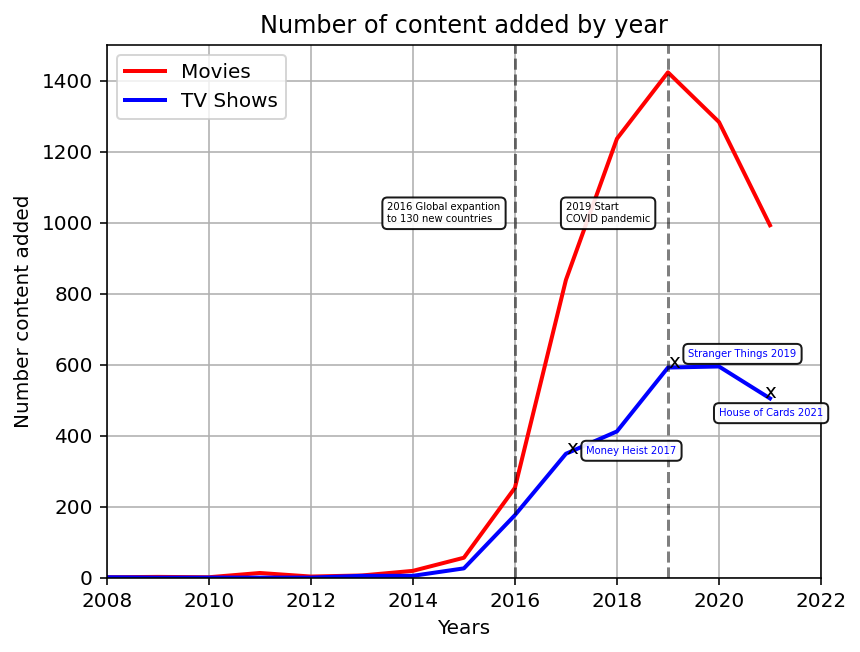

In [675]:
#Creating the lineplot for the number of movies and TV shows added by the time
fig,axs=plt.subplots(dpi=144)
axs.plot(data_line['Movie'],linewidth=2,label='Movies',color='red')
axs.plot(data_line['TV Show'],linewidth=2,label='TV Shows',color='blue')
axs.grid(True)
axs.axis([2008,2022,0,1500])

axs.annotate('x',xy=(2019,data_line.loc[2019,'TV Show']))
axs.annotate('Stranger Things 2019',xy=(2019,data_line.loc[2019,'TV Show']),xytext=(2019+0.4,data_line.loc[2019,'TV Show']+30),fontsize=5,bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9),color='blue')

axs.annotate('x',xy=(2017,data_line.loc[2017,'TV Show']))
axs.annotate('Money Heist 2017',xy=(2017,data_line.loc[2017,'TV Show']),xytext=(2017+0.4,data_line.loc[2017,'TV Show']),fontsize=5,bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9),color='blue')

axs.annotate('x',xy=(2021-0.1,data_line.loc[2021,'TV Show']-0.1))
axs.annotate('House of Cards 2021',xy=(2021,data_line.loc[2021,'TV Show']),xytext=(2021-1,data_line.loc[2021,'TV Show']-50),fontsize=5,bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9),color='blue')

axs.axvline(x=2016,color='k',linestyle='--',alpha=0.5)
axs.annotate('2016 Global expantion\nto 130 new countries',xy=(2016-2.5,1002),xytext=(2016-2.5,1002),fontsize=5,bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9),color='black')

axs.axvline(x=2019,color='k',linestyle='--',alpha=0.5)
axs.annotate('2019 Start\nCOVID pandemic',xy=(2019-2,1002),xytext=(2019-2,1002),fontsize=5,bbox=dict(boxstyle='round,pad=0.5', facecolor='white', alpha=0.9),color='black')

axs.set_xlabel('Years',fontsize=10)
axs.set_ylabel('Number content added',fontsize=10)
axs.set_title('Number of content added by year',fontsize=12)
axs.legend()
plt.show()

In [676]:
data_pareto=data[data['type']=='Movie'][['country','show_id']].copy()

In [677]:
data_pareto_count=data_pareto.groupby('country')['show_id'].count().sort_values(ascending=False)

In [678]:
data_pareto_count[:10].sort_values()/5691

country
Turkey            0.013354
Japan             0.013354
Indonesia         0.013530
Nigeria           0.015112
Egypt             0.016166
Spain             0.017044
Canada            0.021437
United Kingdom    0.036198
India             0.156914
United States     0.361624
Name: show_id, dtype: float64

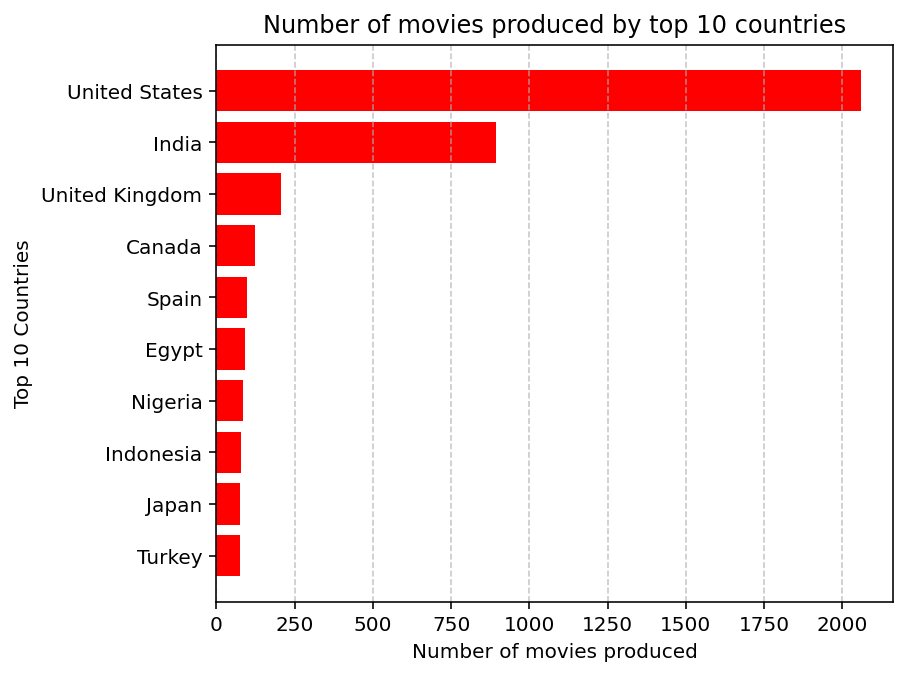

In [679]:
#Code to create the horizontal barchart with the main producers of movies within the catalogue of netflix
countries=['Turkey','Japan','Indonesia','Nigeria','Egypt','Spain','Canada','United Kingdom','India','United States']
fig,axs=plt.subplots(dpi=144)
axs.barh(countries,data_pareto_count[:10].sort_values().values,color='red')
axs.set_title('Number of movies produced by top 10 countries',fontsize=12)
axs.set_xlabel('Number of movies produced',fontsize=10)
axs.set_ylabel('Top 10 Countries',fontsize=10)
axs.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [680]:
data_dots=data[['country','show_id','type','release_year']].copy()
data_dots['release_year']=[int(x) for x in data['release_year']]
data_dots['year_added']=[str(x)[-4:] for x in data['date_added']]
data_dots['year_added']=[int(x) if x!='nan' else float('nan') for x in data_dots['year_added']]
data_dots=data_dots[data_dots['type']=='Movie']

In [681]:
data_dots=data_dots.groupby('country').aggregate({'show_id':'count','release_year':'mean','year_added':'mean'})

In [682]:
data_dots=data_dots.sort_values(by='show_id',ascending=False)[:10]
data_dots=data_dots[['release_year','year_added']]

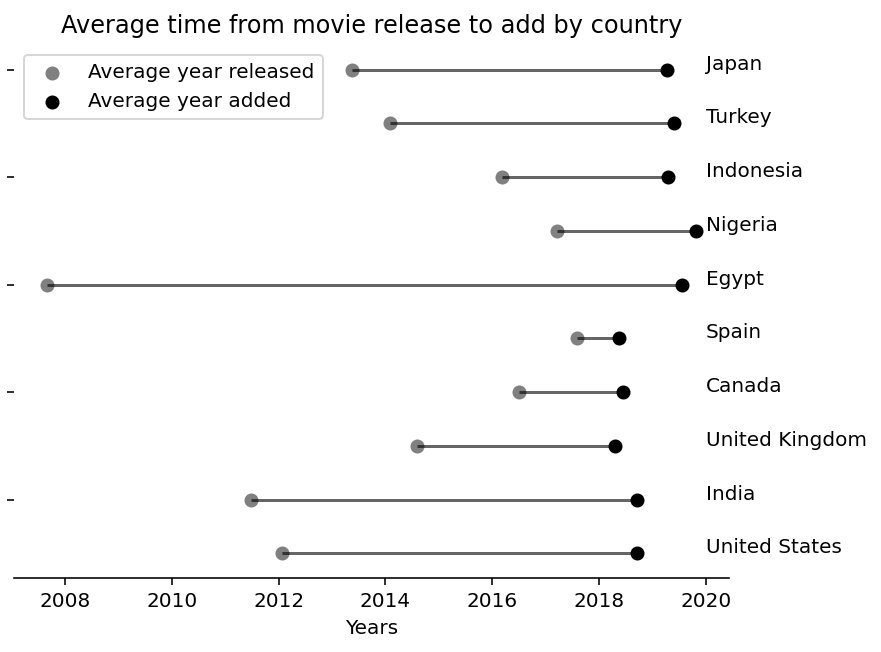

In [683]:
# Alternative plot of average year of release and adition of movies produced in the main countries in Netflix catalogue
fig,axs=plt.subplots(dpi=144)
axs.hlines(y=range(1,11),xmin=data_dots['release_year'],xmax=data_dots['year_added'],color='k',alpha=0.6)
axs.scatter(data_dots['release_year'],range(1,11),color='grey',label='Average year released')
axs.scatter(data_dots['year_added'],range(1,11),color='k',label='Average year added')
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
axs.spines['left'].set_visible(False)
axs.set_title('Average time from movie release to add by country',fontsize=12)
axs.set_xlabel('Years')
axs.yaxis.set_ticklabels([])
for a,n in zip(data_dots.index,range(1,11)):
    axs.annotate(a,xy=(2020,n))
plt.legend()

In [696]:
#Table of the country and rating

In [713]:
data_table=data[['country','show_id','type','release_year','rating']].copy()
data_table['release_year']=[int(x) for x in data['release_year']]
data_table['year_added']=[str(x)[-4:] for x in data['date_added']]
data_table['year_added']=[int(x) if x!='nan' else float('nan') for x in data_table['year_added']]
data_table=data_table[data_table['type']=='Movie']

In [714]:
data_table=data_table[data_table['year_added']==2019].groupby(['country','rating'])['show_id'].count().sort_values(ascending=False)[:20]

In [715]:
data_table=data_table.reset_index()

In [723]:
pivot=pd.pivot_table(data=data_table,index='country',columns='rating',values='show_id',aggfunc='sum')

In [728]:
pivot.to_excel('pivot.xlsx')